In [1]:
import math
%pylab inline
import pylab, sys
from scipy.optimize import fsolve
from random import random
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
transmit = {
    'Tx0': (0.0, 0.0, 0.0),
    'Tx1': (290.0, 290.0, 30.0),
    'Tx2': (10.0, 10.0, 5.0),
}

receive = {
    'Rx4': (0.0, 200.0, 10.0),
    'Rx6': (200.0, 0.0, 20.0),
    'Rx7': (0.0, -200.0, 15.0),
}

xTx0, yTx0, zTx0 = transmit['Tx0'] 
xTx1, yTx1, zTx1 = transmit['Tx1'] 
xTx2, yTx2, zTx2 = transmit['Tx2'] 

x4, y4, z4 = receive['Rx4']
x6, y6, z6 = receive['Rx6']
x7, y7, z7 = receive['Rx7']
xAve, yAve, zAve = (x4+x6+x7)/3, (y4+y6+y7)/3, (z4+z6+z7)/3

In [3]:
# Solve for the transmit location using TDOA 
def tdoa(p): 
    global t67,t74,x4,x6,x7,y4,y6,y7,c
    x,y = p 
    
    d4 = math.sqrt((x4 - x)**2 + (y4 - y)**2) 
    d6 = math.sqrt((x6 - x)**2 + (y6 - y)**2) 
    d7 = math.sqrt((x7 - x)**2 + (y7 - y)**2) 
    
    return(t67 - ((d6/c) - d7/c), 
           t74 - ((d7/c) - d4/c))

def tdoa2(p): 
    global t67,t74,x4,x6,x7,y4,y6,y7,c
    x,y = p 
    
    d4 = math.sqrt((x4 - x)**2 + (y4 - y)**2 + (z4)**2) 
    d6 = math.sqrt((x6 - x)**2 + (y6 - y)**2 + (z6)**2) 
    d7 = math.sqrt((x7 - x)**2 + (y7 - y)**2 + (z7)**2) 
    
    return(t67 - ((d6/c) - d7/c), 
           t74 - ((d7/c) - d4/c))

In [4]:
#class tdoaTransmit:
#    def __init__(self,t67,t74,x4,x6,x7,y4,y6,y7,c):
#        self.t67 = t67; self.t74 = t74
#        self.x4 = x4; self.x6 = x6; self.x7 = x7
#        self.y4 = y4; self.y6 = y6; self.y7 = y7
#        self.x = x; self.y = y
#    
#     Solve for the transmit location using TDOA 
#    def tdoa(p): 
#        self.x,self.y = p 
#        d4 = math.sqrt((self.x4 - self.x)**2 + (self.y4 - self.y)**2) 
#        d6 = math.sqrt((self.x6 - self.x)**2 + (self.y6 - self.y)**2) 
#        d7 = math.sqrt((self.x7 - self.x)**2 + (self.y7 - self.y)**2) 
#        return(self.t67 - ((d6/self.c) - d7/self.c), 
#               self.t74 - ((d7/self.c) - d4/self.c))

Calculated Tx (x0,y0): -124.17602778320642 35.40030806951023
Calculated Tx (x1,y1): -124.17602778328968 35.400308069511176
Calculated Tx (x2,y2): -124.17602778314776 35.40030806952588
------------------------------------------------------
Actual Tx (x,y): 0.0 0.0
Average Tx (x,y): 66.6666666667 0.0
Substituting the Calculated x,y back into the function: (1.1159659080075407e-19, -1.9481757786848908e-20)


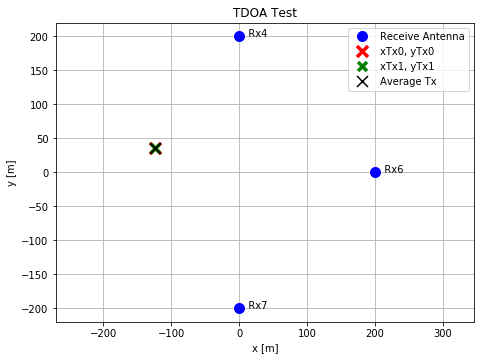

In [5]:
c = 299792458.0 # Speed of light [m/sec]
## MANUALLY CHANGE THESE TIME DIFFERENCES TO SEE HOW IT IMPACTS THE LOCATION OF THE TRANSMIT SITE WITH 
## RESPECT TO THE THREE RECEIVE SITES
t67=0.2e-6 
t74=0.2e-6 

pylab.figure(figsize=(7.5,5.5))
pylab.plot([x4,x6,x7], [y4,y6,y7], 'bo',markersize=10.0, label='Receive Antenna')

x0, y0 = fsolve(tdoa, (xTx0, yTx0)) # xTx0, yTx0 = 0.0, 0.0
pylab.plot([x0], [y0], 'rx',mew=3.5, markersize=11.0, label='xTx0, yTx0')

x1, y1 = fsolve(tdoa, (xTx1, yTx1)) # xTx1, yTx1 = 100.0, 90.0
pylab.plot([x1], [y1], 'gx',mew=3.5, markersize=9.0, label='xTx1, yTx1')

x2, y2 = fsolve(tdoa, (xAve, yAve)) # xAve, yAve = 66.6666666667, 0.0
pylab.plot([x2], [y2], 'kx',mew=1.5, markersize=11.0, label='Average Tx')
plt.text(x4,y4,'   Rx4'); plt.text(x6,y6,'   Rx6'); plt.text(x7,y7,'   Rx7')
pylab.title('TDOA Test')
pylab.xlabel('x [m]')
pylab.ylabel('y [m]')
pylab.grid()
pylab.legend()
pylab.axis('equal')
plt.savefig('TdoaTest.svg', bbox_inches='tight')

print 'Calculated Tx (x0,y0):', x0, y0
print 'Calculated Tx (x1,y1):', x1, y1
print 'Calculated Tx (x2,y2):', x2, y2
print '------------------------------------------------------'
print 'Actual Tx (x,y):', xTx0, yTx0
print 'Average Tx (x,y):', xAve, yAve
print 'Substituting the Calculated x,y back into the function:', tdoa((x0, y0)) 

In [6]:
R4 = math.sqrt((x4-0.0)**2 + (y4-0.0)**2)
R6 = math.sqrt((x6-0.0)**2 + (y6-0.0)**2)
R7 = math.sqrt((x7-0.0)**2 + (y7-0.0)**2)
print R4, R6, R7

t67 = (R6/c) - (R7/c)
t74 = (R7/c) - (R4/c)

dist67 = math.sqrt((x6 - x7)**2 + (y6 - y7)**2)
dist74 = math.sqrt((x7 - x4)**2 + (y7 - y4)**2)
print 'dist67:', dist67, '--- time67:', dist67/c, t67
print 'dist74:', dist74, '--- time74:', dist74/c, t74




200.0 200.0 200.0
dist67: 282.842712475 --- time67: 9.434617347e-07 0.0
dist74: 400.0 --- time74: 1.33425638079e-06 0.0


In [7]:
def std_dev(a_list): # Computes the Standard Deviation, taken from Alex Orange
    mean = sum(a_list)/len(a_list)
    return math.sqrt(sum([(_-mean)**2 for _ in a_list])/(len(a_list)-1))

def d(xT, yT, xR, yR): # Cartesian Distance Formula for 2-Dimensions
    dist = math.sqrt(((xR)-xT)**2 + ((yR)-yT)**2)
    return dist

dist = {
    'Honors': d(xTx0, yTx0, x4, y4),          # 4
    'SouthMedical': d(xTx0, yTx0, x6, y6),    # 6
    'SMBB': d(xTx0, yTx0, x7, y7),            # 7
}

x = -2.331323764257263 y = -28.387393407596406
The average x,y of the 3 Receivers: 66.6666666667 , 0.0
Standard Deviation: 1.46327361799
Difference between the std_dev and the average for x,y: 23.555860969858877 13.237348136947727
Difference between Esimated & Actual Tx site in meters (x,y): -2.331323764257263 , -28.387393407596406


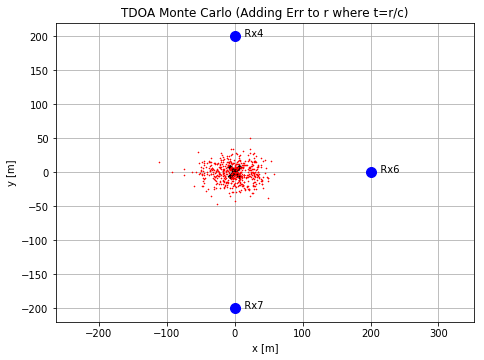

In [8]:
# MONTE CARLO TDOA WITH ERROR ADDED TO R WHERE TIME=R/C AND C=SPEED OF LIGHT
pylab.figure(figsize=(7.5,5.5))
pylab.plot([x4,x6,x7],[y4,y6,y7],'bo',markersize=10.0, label='Receive Antenna')
plt.text(x4,y4,'   Rx4'); plt.text(x6,y6,'   Rx6'); plt.text(x7,y7,'   Rx7')
pylab.title('TDOA Monte Carlo (Adding Err to r where t=r/c)')
pylab.xlabel('x [m]')
pylab.ylabel('y [m]')
pylab.grid()
pylab.axis('equal') 

# The main goal of Monte Carlo is to use repeated random sampling 
# to obtain numerical results. The most straightforward algorithm 
# for Monte Carlo can basically be broken down into the following steps:

#    1) Get some random input
#    2) Evaluate
#    3) Repeat steps 1 and 2 as needed (To improve accuracy, more is better)
#    4) Determine the average of all these samples and multiply by the range

r_xList=[]; r_yList=[]; r4N=[]; r6N=[]; r7N=[]
# t67 = (dist['SouthMedical']/c) - (dist['SMBB']/c)
# t74 = (dist['SMBB']/c) - (dist['Honors']/c)
R4 = math.sqrt((x4-0.0)**2 + (y4-0.0)**2)
R6 = math.sqrt((x6-0.0)**2 + (y6-0.0)**2)
R7 = math.sqrt((x7-0.0)**2 + (y7-0.0)**2)

stdev = 20.0 # INPUT STANDARD DEVIATION
n = 500
for k in range(0,n):  
    
    ## Adding random Gaussian error 
    
    r4_err = R4 + np.random.normal(0.0, stdev)
    r4N.append(r4_err)
    r6_err = R6 + np.random.normal(0.0, stdev)
    r6N.append(r6_err)
    r7_err = R7 + np.random.normal(0.0, stdev)
    r7N.append(r7_err)
    
    t67 = (r6_err/c) - (r7_err/c)
    t74 = (r7_err/c) - (r4_err/c)
    
    xMonte, yMonte = fsolve(tdoa, (xAve, yAve)) # Plot Transmit Location
    r_xList.append(xMonte); r_yList.append(yMonte)
    
# print 't4 Err:', t4N[k] - t4, '|', 't6 Err:', t6N[k] - t6, '|', 't7 Err:', t7N[k] - t7 
print 'x =',r_xList[k], 'y =',r_yList[k] # 'x =',xList[k], 'y =',yList[k]
print 'The average x,y of the 3 Receivers:', xAve, ',' ,yAve

pylab.plot([xTx0], [yTx0], 'kx', mew=4.0, markersize=12.5) # Plot black 'X', the actual Tx site
pylab.plot(r_xList, r_yList,'rx',markersize=1.0,label='Transmitter') # Plot the red dots (Error)
plt.savefig('TdoaTest_Monte_Carlo.svg',  bbox_inches='tight')
#------------------------------------------------------------------------------------------------------------------

a = [np.random.normal(0, 1.5) for _ in range(1000)]
print 'Standard Deviation:', std_dev(a)

# print 'Comparing Power Numbers ', p4, (1/(tXrXDist['Honors']**2)), 10**(p4/10.0)
stdDevX = std_dev(r_xList); stdDevY = std_dev(r_yList) # Standard Deviation for x & y Lists
x_Average = (sum(r_xList)/len(r_xList)); y_Average = (sum(r_yList)/len(r_yList)) # x,y Averages
print 'Difference between the std_dev and the average for x,y:', stdDevX + x_Average, stdDevY + y_Average

xDiff = xMonte - xTx0; yDiff = yMonte - yTx0
print 'Difference between Esimated & Actual Tx site in meters (x,y):', xDiff, ',', yDiff

In [9]:
# Function to find covariance
# Source: https://www.geeksforgeeks.org/program-find-covariance/
#  Covariance is a measure of how much two random variables vary together
def cov(arr1, arr2, n): 
    s = 0.0
    for i in range(0, n): 
        s = (s + (arr1[i] - mean(arr1, n)) *
                      (arr2[i] - mean(arr2, n))) 
    return s / (n - 1.0)  

# Function to find mean
def mean(arr, n): # Function to find mean.
    s = 0.0
    for i in range(0, n): 
        s = s + arr[i] 
    return s / n

def std_dev(a_list): # Computes the Standard Deviation, taken from Alex Orange
    mean = sum(a_list)/len(a_list)
    return math.sqrt(sum([(_-mean)**2 for _ in a_list])/(len(a_list)-1))

def var(a_list):
    mean = sum(a_list)/len(a_list)
    return(math.sqrt(sum([(_-mean)**2 for _ in a_list])/(len(a_list)-1))**2)

x = 24.905025071831858 y = 2.2051966519809096
The average x,y of the 3 Receivers: 66.6666666667 , 0.0
 
stdDevX: 39.0011641253 stdDevY: 21.0072439215
 
Difference between the std_dev and the average for x,y: 37.164925813306674 21.84412904794681
Difference between Esimated & Actual Tx site in meters (x,y): 24.905025071831858 , 2.2051966519809096


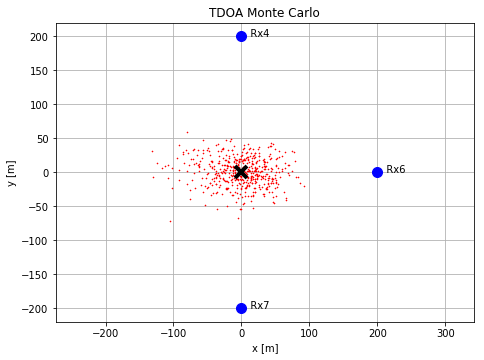

In [10]:
# MONTE CARLO ADDED TO THE TIME E.G. TIME = (R/C) + ERR

pylab.figure(figsize=(7.5,5.5))
pylab.plot([x4,x6,x7],[y4,y6,y7],'bo',markersize=10.0, label='Receive Antenna')
plt.text(x4,y4,'   Rx4'); plt.text(x6,y6,'   Rx6'); plt.text(x7,y7,'   Rx7')
pylab.title('TDOA Monte Carlo')
pylab.xlabel('x [m]')
pylab.ylabel('y [m]')
pylab.grid()
pylab.axis('equal') 

xList=[]; yList=[]; t4N=[]; t6N=[]; t7N=[]
R4 = math.sqrt((x4-0.0)**2 + (y4-0.0)**2)
R6 = math.sqrt((x6-0.0)**2 + (y6-0.0)**2)
R7 = math.sqrt((x7-0.0)**2 + (y7-0.0)**2)

stdev = 100e-9 # INPUT STANDARD DEVIATION (100ns)
n = 500
for k in range(0,n):  
    
    # Adding random Gaussian error 
    t4 = (R4/c) + np.random.normal(0.0, stdev)
    t6 = (R6/c) + np.random.normal(0.0, stdev)
    t7 = (R7/c) + np.random.normal(0.0, stdev)
    
    t67 = t6 - t7
    t74 = t7 - t4
    
    xMonte, yMonte = fsolve(tdoa, (xAve, yAve)) # Plot Transmit Location
    xList.append(xMonte); yList.append(yMonte)
    
print 'x =',xList[k], 'y =',yList[k] 
print 'The average x,y of the 3 Receivers:', xAve, ',' ,yAve
print ' '

pylab.plot(xList, yList,'rx',markersize=1.0,label='Transmitter') # Plot the red dots (Error)
pylab.plot([xTx0], [yTx0], 'kx', mew=4.0, markersize=12.5) # Plot black 'X', the actual Tx site
plt.savefig('Tdoa_MonteCarlo.svg',  bbox_inches='tight')
#------------------------------------------------------------------------------------------------------------------

stdDevX = std_dev(xList); stdDevY = std_dev(yList) # Standard Deviation for x & y Lists
print 'stdDevX:', stdDevX, 'stdDevY:', stdDevY
print ' '

x_Average = (sum(xList)/len(xList)); y_Average = (sum(yList)/len(yList)) # x,y Averages
print 'Difference between the std_dev and the average for x,y:', stdDevX + x_Average, stdDevY + y_Average

xDiff = xMonte - xTx0; yDiff = yMonte - yTx0
print 'Difference between Esimated & Actual Tx site in meters (x,y):', xDiff, ',', yDiff